In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from stats_tools import auto_stats
import matplotlib.pyplot as plt
from params import *

## PARAMS

In [29]:
# ecg_interesting_metrics = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
ecg_interesting_metrics = ['HRV_RMSSD', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
ppg_interesting_metrics = ['mean amplitude', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
eda_interesting_metrics = ['nb_peaks', 'mean_height', 'EDA_Symp', 'EDA_SympN']

In [30]:
outcomes = {
    'eeg':['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4'],
    'ppg': ppg_interesting_metrics,
    'ecg': ecg_interesting_metrics,
    'eda': eda_interesting_metrics
}

In [5]:
predictor = 'room'
subject = 'participant'

In [6]:
savefig = False

## TOOLS

In [7]:
def load(dtype):
    df = pd.read_excel(f'../metrics/{dtype}_metrics.xlsx').drop(columns = 'Unnamed: 0')
    if dtype == 'eeg': # mean both sides
        df = df.set_index(['participant','room'])
        df_right = df[df['chan'] == 'EEGR']
        df_left = df[df['chan'] == 'EEGL']
        data_right = df_right.drop(columns='chan').values
        data_left = df_left.drop(columns='chan').values
        
        mean_electrodes = (data_right + data_left) / 2
        
        df = pd.DataFrame(data=mean_electrodes, columns = ['Hz_30_80','Hz_13_30','Hz_8_13','Hz_4_8','Hz_1_4'], index=df_right.index).reset_index()
        # df['room'] = df_right['room']
        # df['participant'] = df_right['participant']
        
    return df

## GO

In [8]:
df = load('eda')

In [9]:
df.groupby(predictor).mean()

,nb_peaks,mean_height,EDA_Symp,EDA_SympN
room,,,,
Baseline,21.80,4.543025,24.705902,0.032726
Bats,21.20,6.948584,58.698202,0.021834
Canopy,22.50,6.069368,115.603475,0.040436
End of the world,16.75,7.858456,28.730192,0.021266
Grassland,17.40,7.401294,64.886449,0.012040
Savannah,22.20,4.816766,42.540273,0.021857
Sea,19.10,8.737791,90.796353,0.024333
Take-off,23.10,3.743449,28.049528,0.017574
Underground,25.20,7.055535,48.186019,0.025279


In [10]:
df.groupby(subject).mean()

,nb_peaks,mean_height,EDA_Symp,EDA_SympN
participant,,,,
P01PPILNI,10.444444,10.034970,63.438069,0.019662
P03PBABCO,20.625000,9.873267,224.377073,0.033349
P07GHOLE,27.333333,0.775145,1.646200,0.031584
P08AKKOR,54.222222,0.155471,0.061007,0.019051
P10LEVVA,9.222222,6.165537,40.709062,0.017447
P11KERSA,20.888889,3.071802,22.459622,0.013659
P12BOULI,31.000000,1.357625,4.377070,0.037487
P15LEPMA,15.333333,8.153394,41.210409,0.013811
P16MAUAD,7.333333,12.808345,115.552936,0.025987


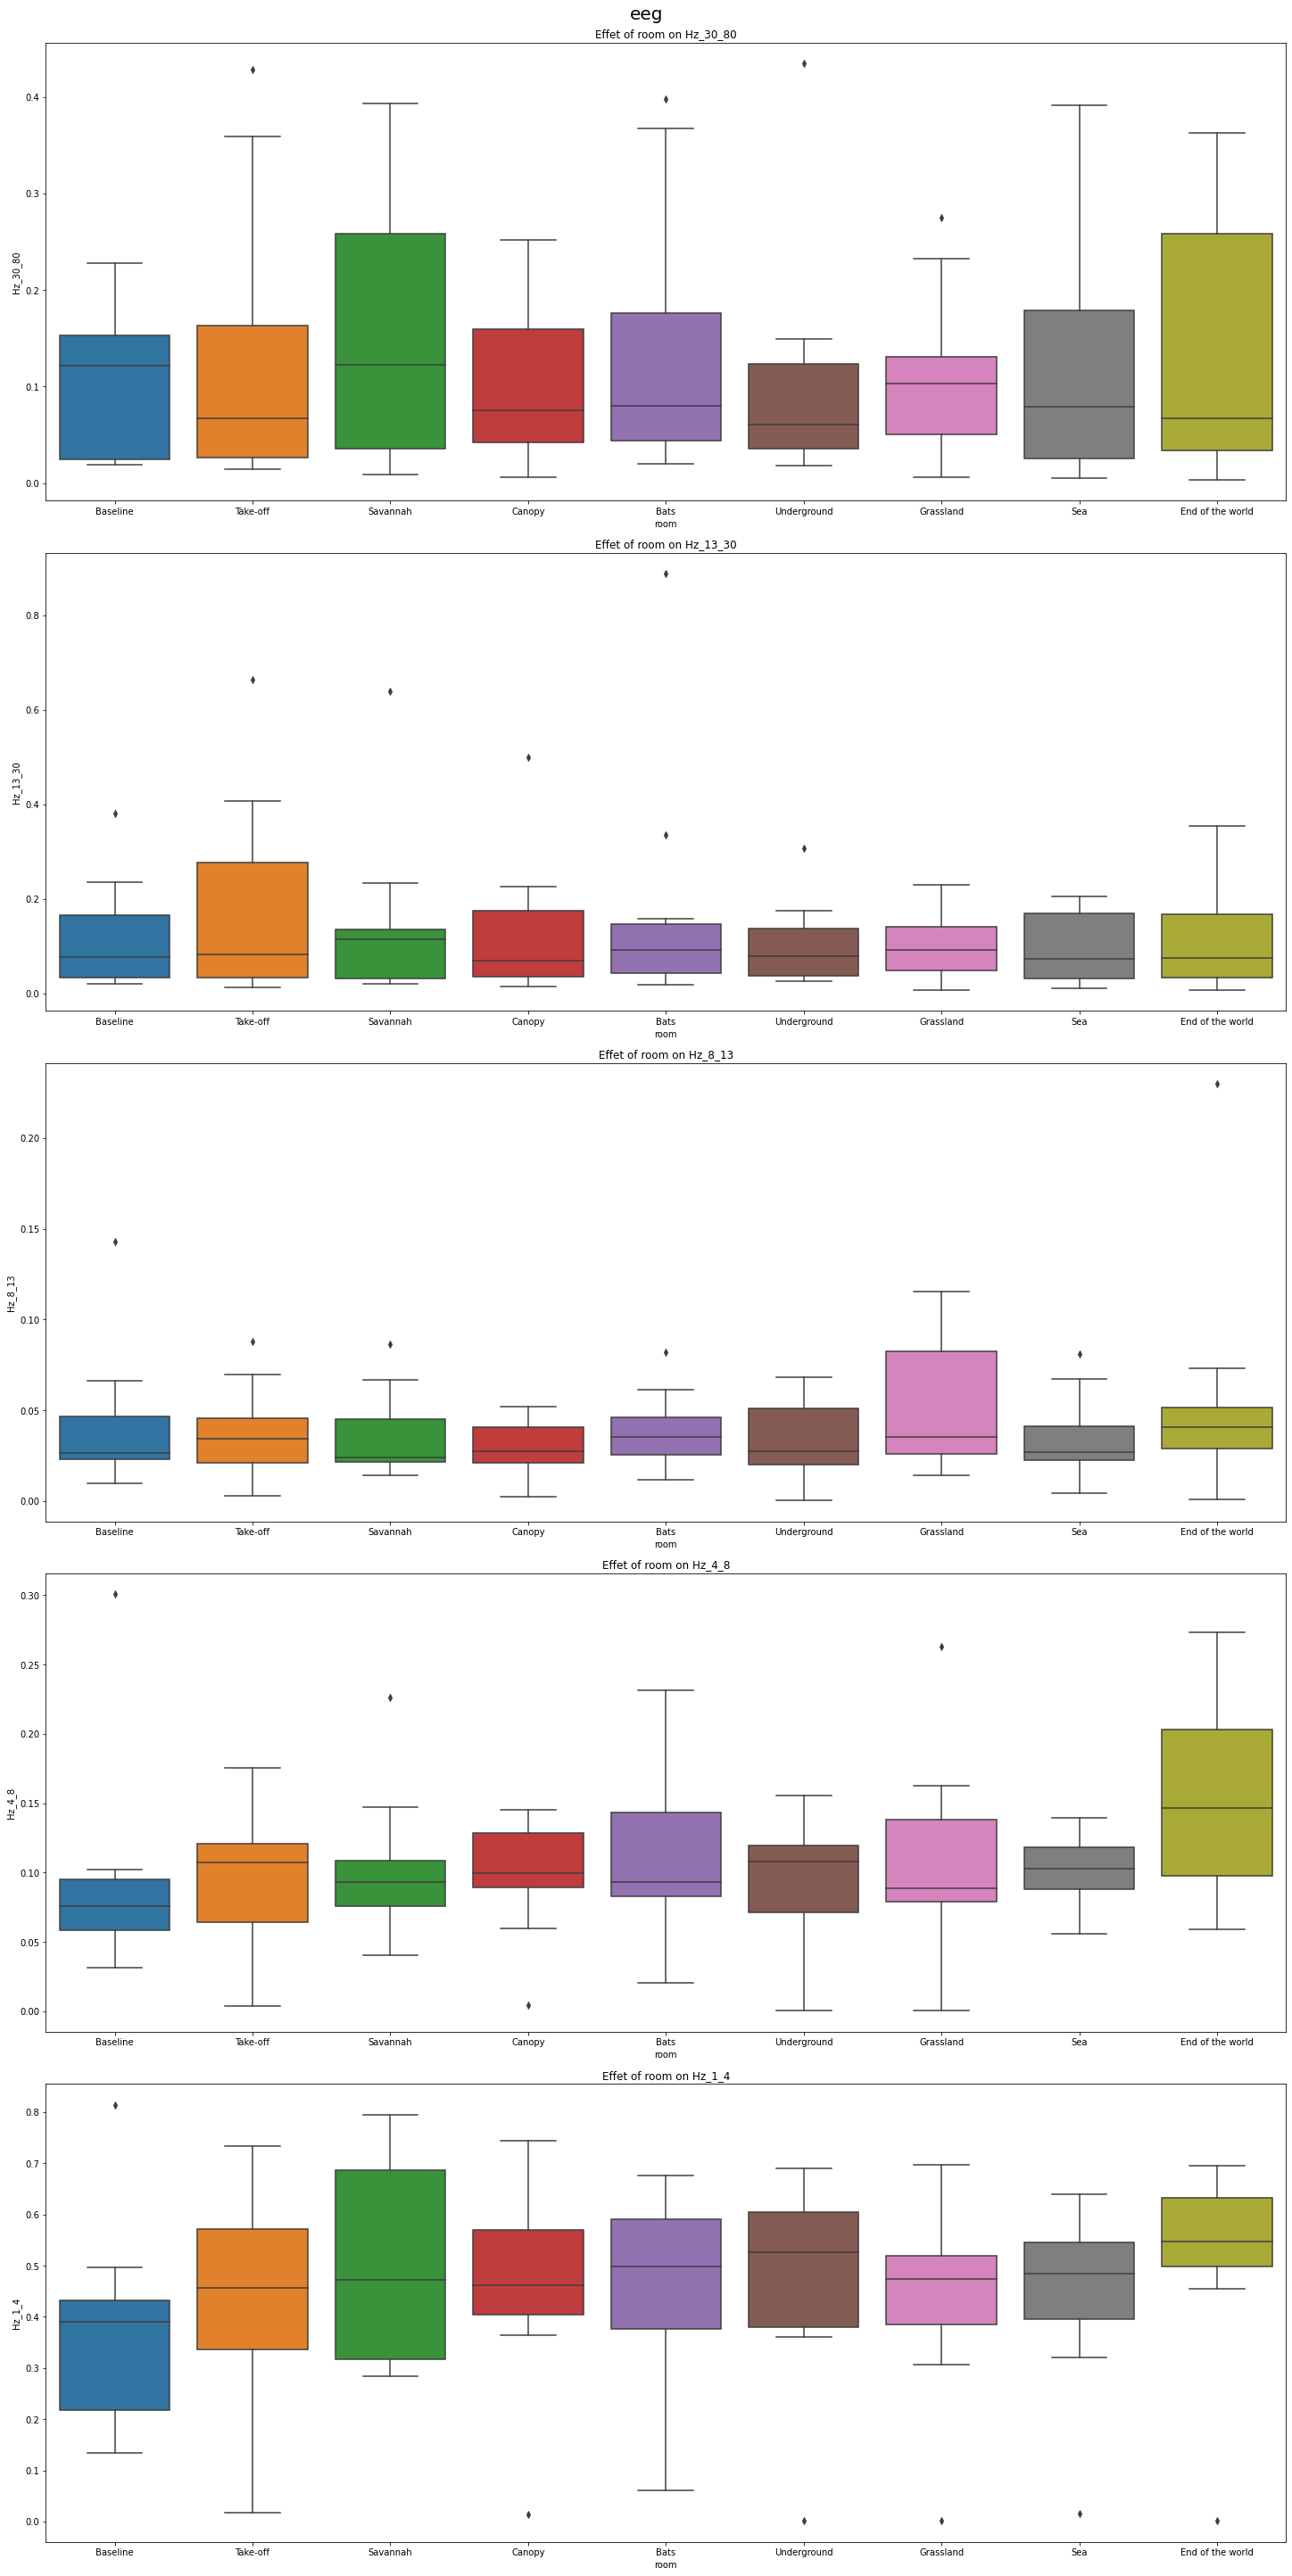

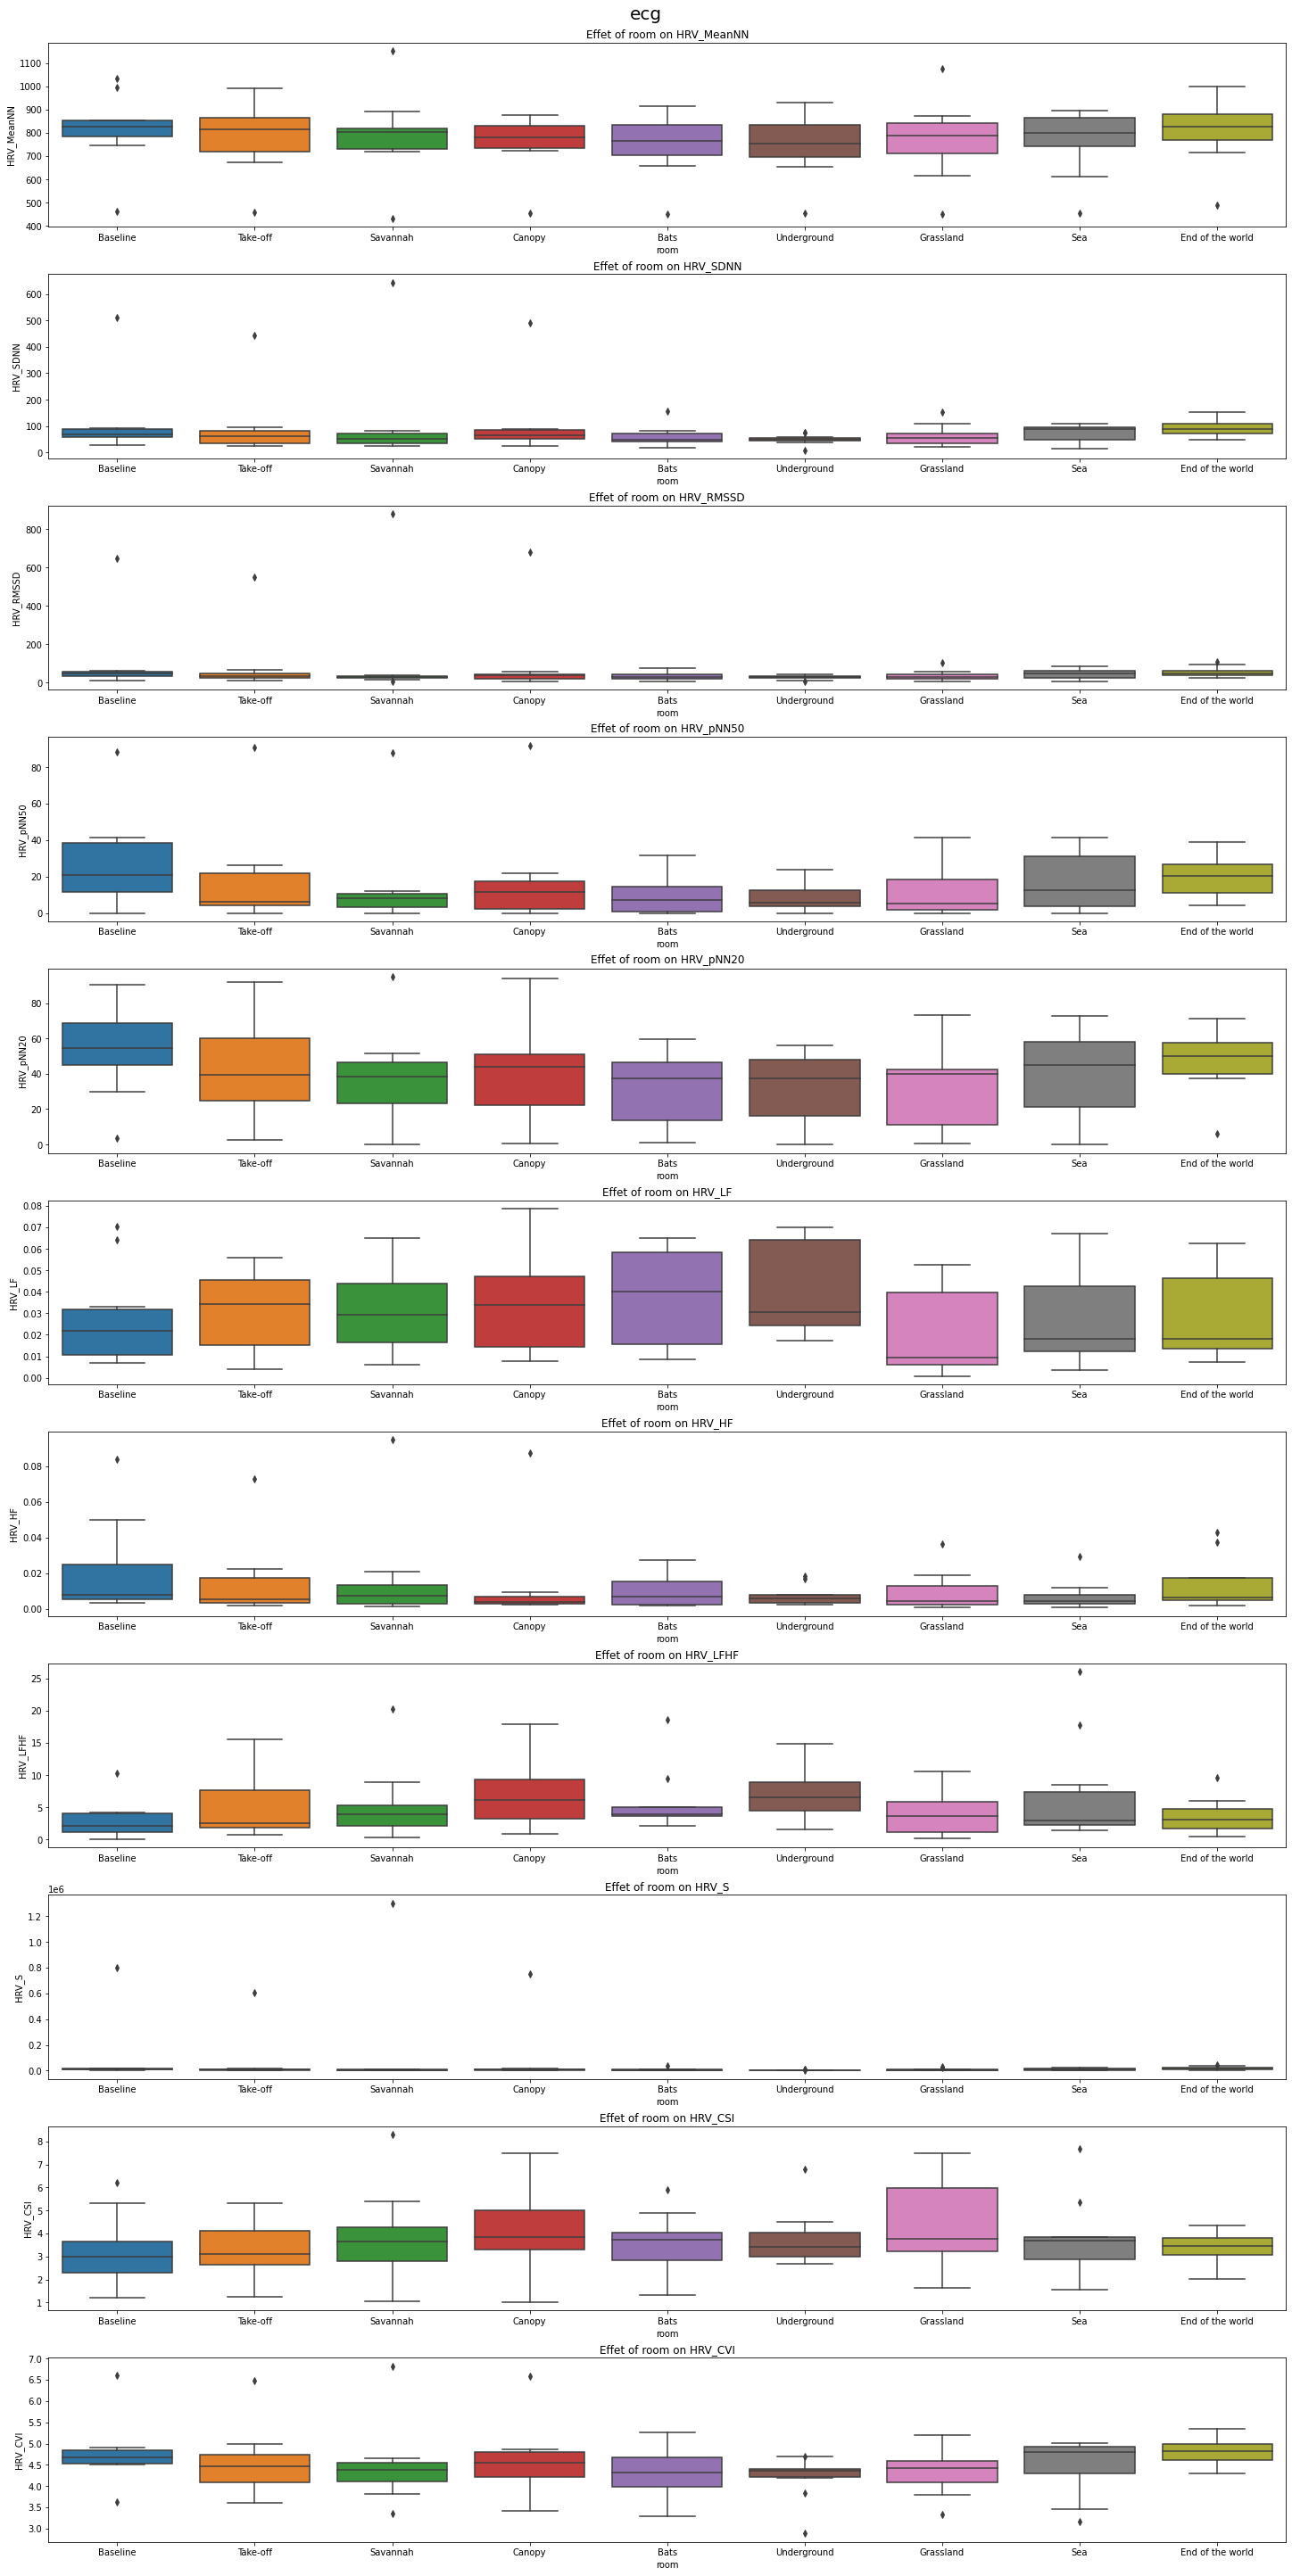

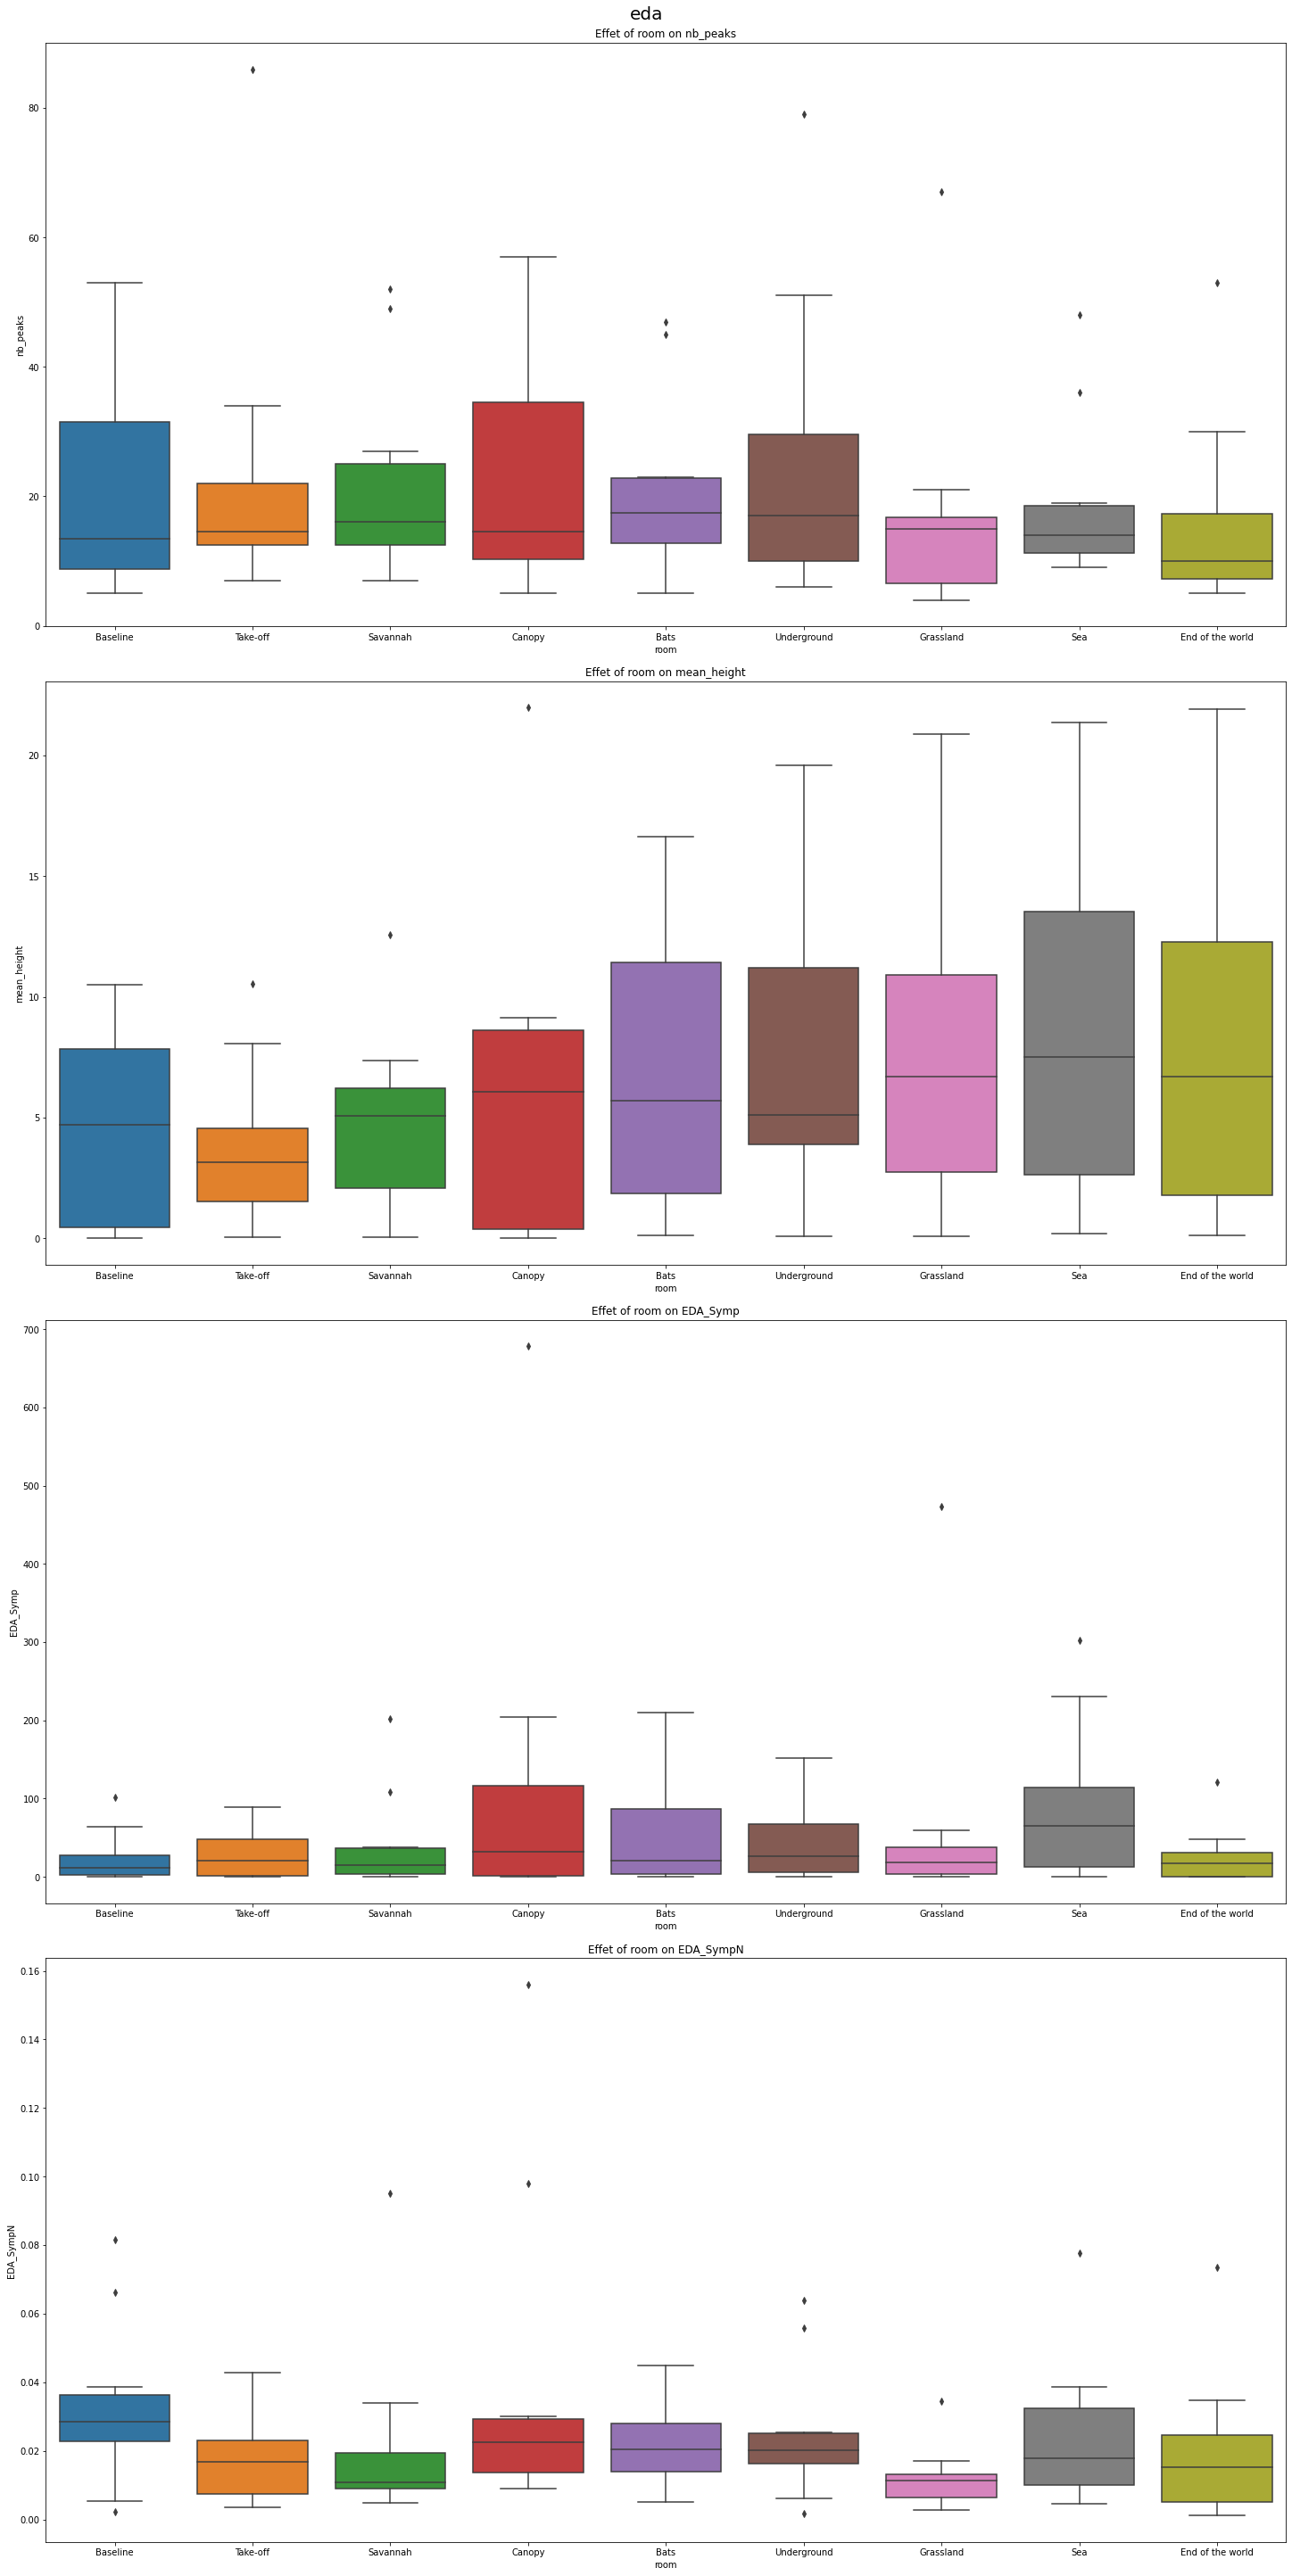

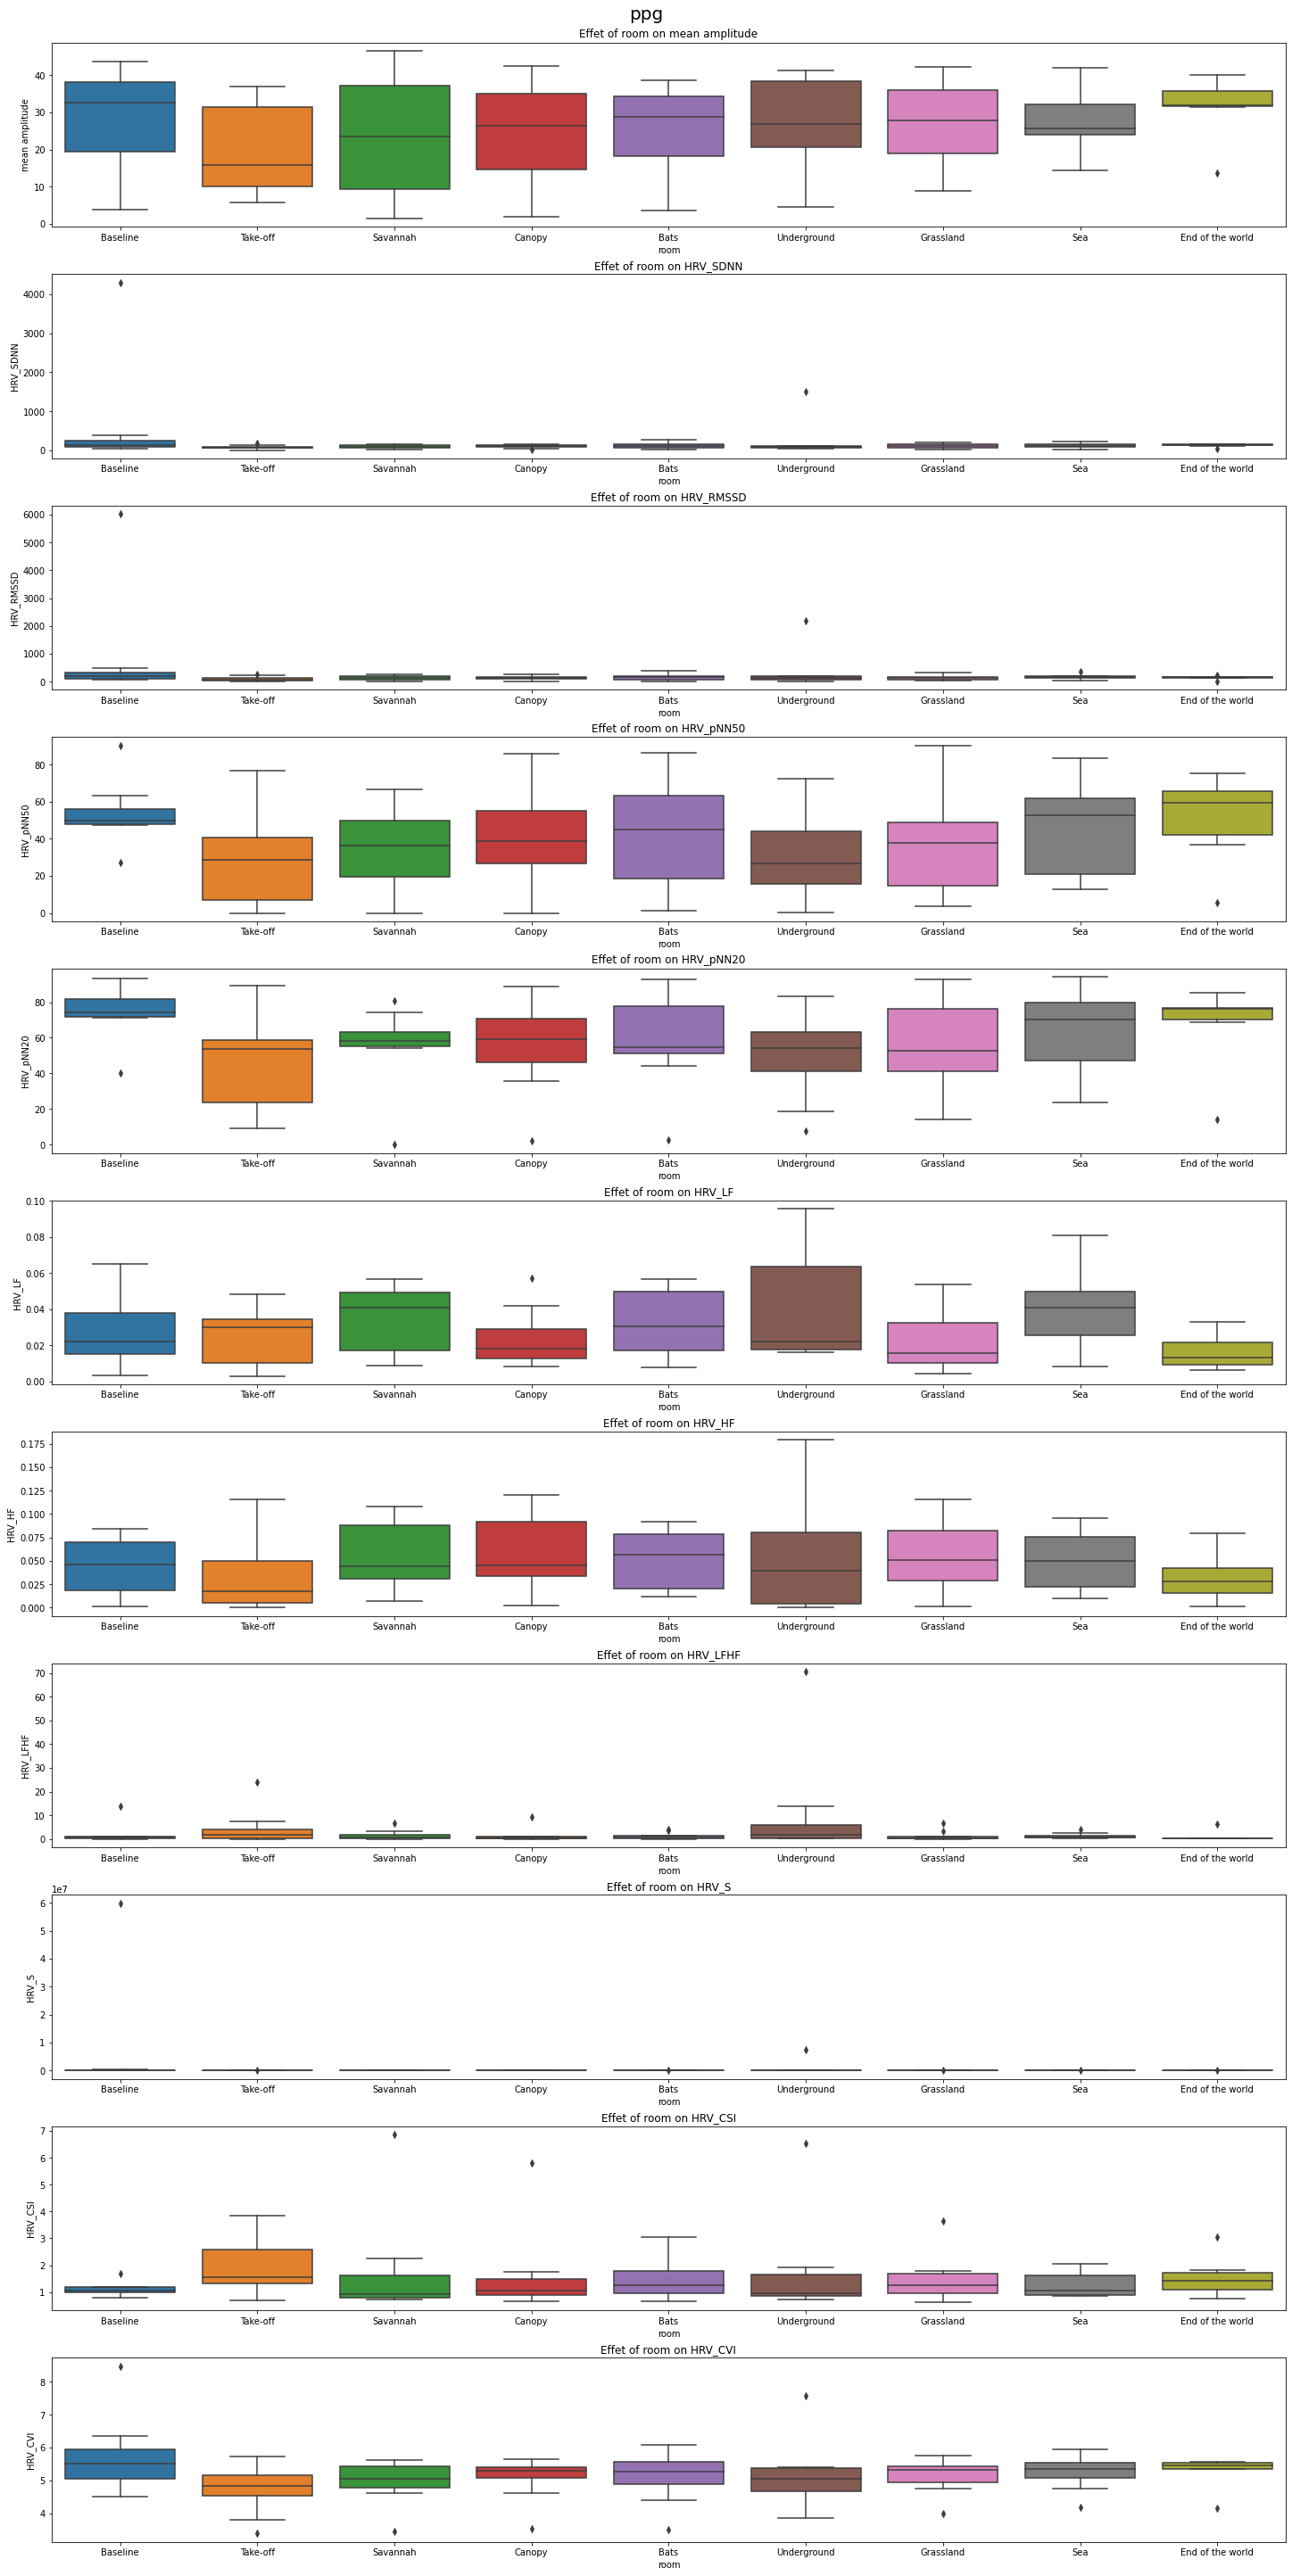

In [14]:
for dtype in ['eeg','ecg','eda','ppg']:
    df = load(dtype)
    loop_outcomes = outcomes[dtype]
    fig, axs = plt.subplots(nrows = len(loop_outcomes), figsize = (20,40), constrained_layout = True)
    fig.suptitle(f'{dtype}', fontsize = 20)
    for row, outcome in enumerate(loop_outcomes):
        ax = axs[row]
        sns.boxplot(data=df , x=predictor , y = outcome, ax = ax)
        ax.set_title(f'Effet of {predictor} on {outcome}')
    if savefig:
        plt.savefig(f'../stats/figs/boxplot_{dtype}')
    plt.show()

In [16]:
ecg_metrics = load('ecg')

In [35]:
ecg_metrics.set_index(['participant','room']).groupby('room').mean()['HRV_RMSSD']

room
Baseline            102.768341
Bats                 32.191415
Canopy               97.009388
End of the world     55.640811
Grassland            35.213345
Savannah            110.855745
Sea                  43.251115
Take-off             84.135116
Underground          27.209549
Name: HRV_RMSSD, dtype: float64

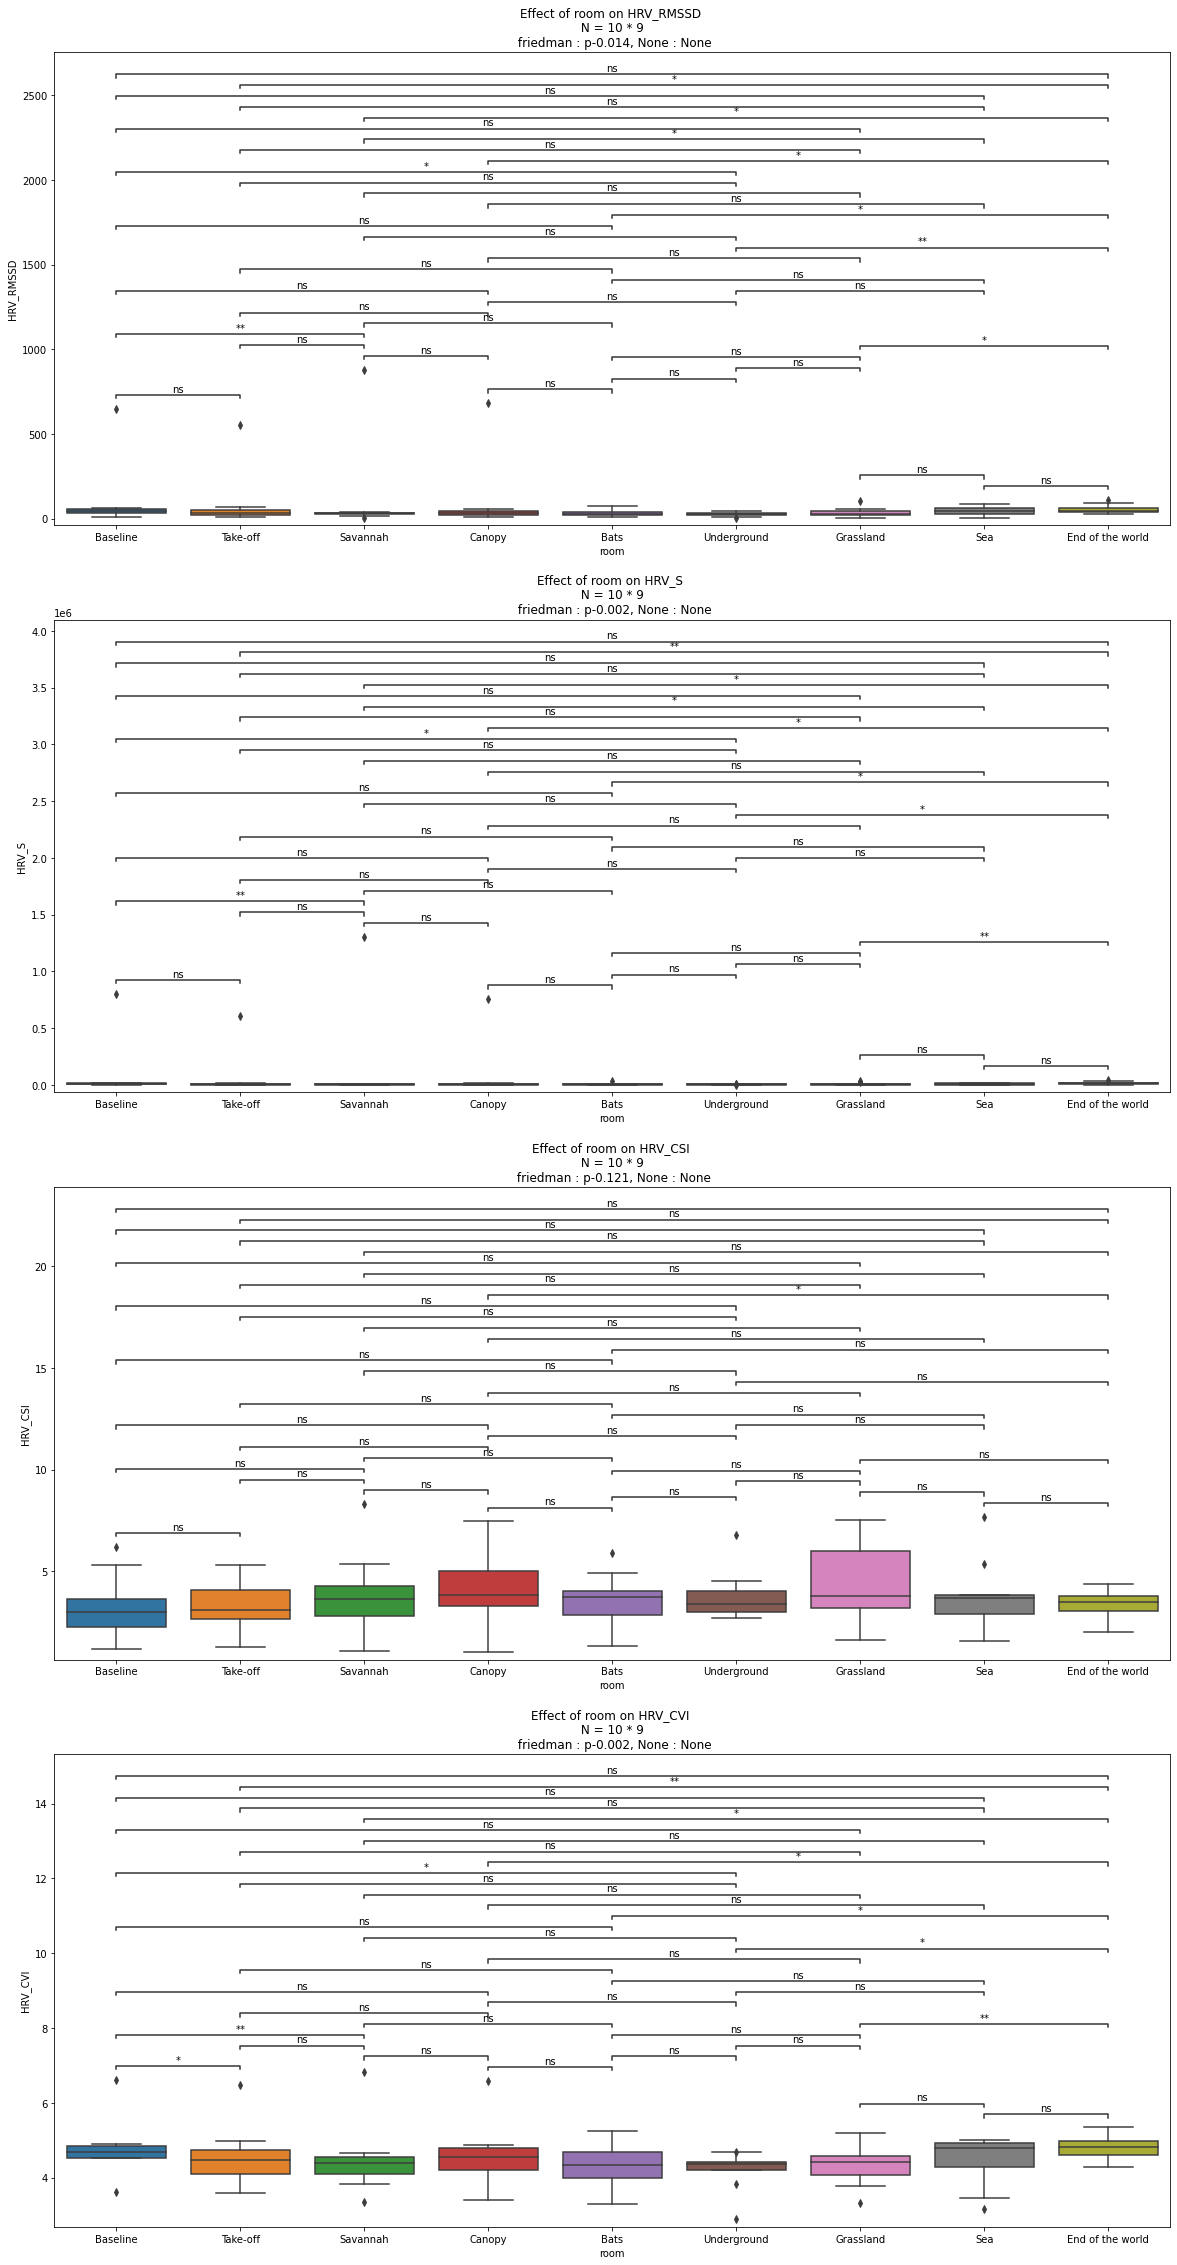

In [31]:
fig, axs = plt.subplots(nrows = len(outcomes['ecg']), figsize = (20,40))
for row, outcome in enumerate(outcomes['ecg']):
    ax = axs[row]
    auto_stats(df=ecg_metrics, predictor='room', outcome = outcome, design = 'within', subject = 'participant', ax=ax)
plt.show()